# Air BNB Case Study

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df=pd.read_csv("C:/Users/neela/Downloads/AB_NYC_2019.csv",encoding="unicode_escape()")

In [18]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [19]:
df.shape

(48895, 16)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [21]:
#statistical summary
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Data cleaning


In [22]:
df.drop(columns=['last_review','latitude','longitude'],inplace=True)

In [23]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,6,2


In [24]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [25]:
df['reviews_per_month'].fillna(0,inplace=True)

In [26]:
df.dropna(inplace=True)

In [27]:
df.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1802f04d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1802f1a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1802d7990>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1802f2c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1802f2090>],
 'means': []}

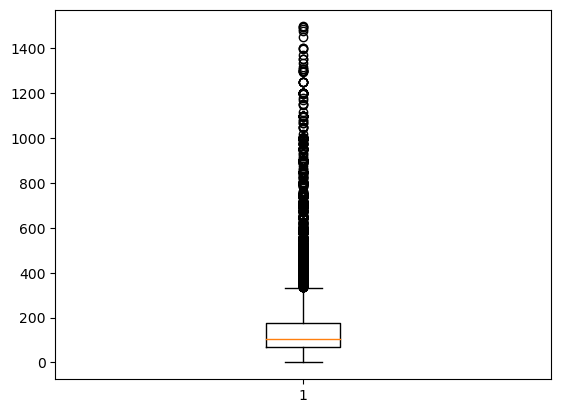

In [34]:
data=df[df['price']<1500]
plt.boxplot(data=data , x='price')



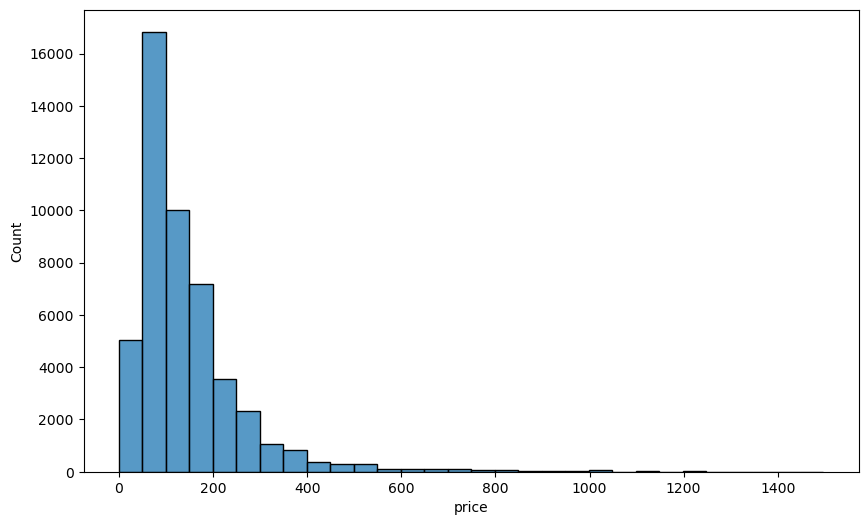

In [36]:
#price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='price', bins=30)

plt.show()


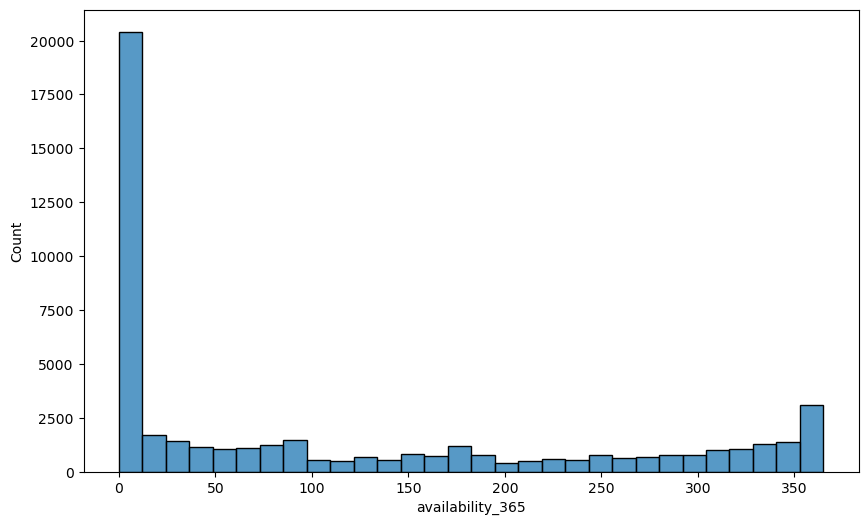

In [42]:
#availability distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='availability_365', bins=30)

plt.show()

In [43]:
data.groupby(by='neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             85.251838
Brooklyn         118.840922
Manhattan        181.501278
Queens            95.229355
Staten Island    101.680108
Name: price, dtype: float64

<Axes: xlabel='neighbourhood_group', ylabel='price'>

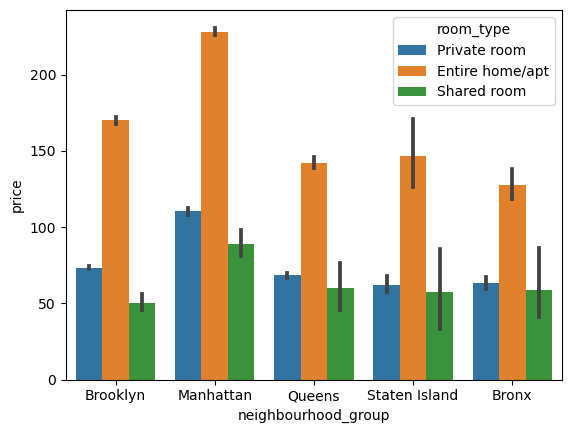

In [48]:
#price vs the neighbourhood group?
sns.barplot(data=data,x='neighbourhood_group',y='price',hue='room_type')


<Axes: xlabel='number_of_reviews', ylabel='price'>

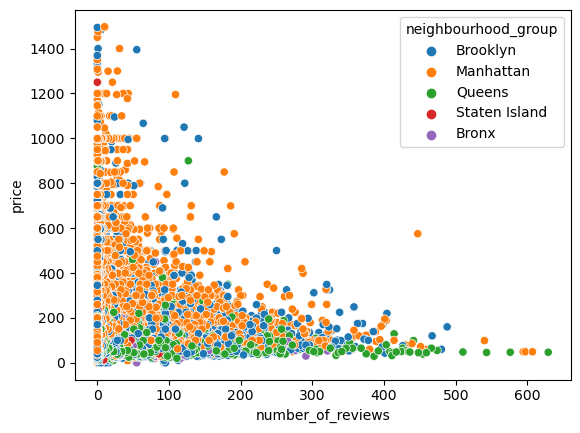

In [50]:
#no.of reviews vs price?
sns.scatterplot(data=data,x='number_of_reviews',y='price',hue='neighbourhood_group')

In [51]:
data.corr()

C:\Users\neela\AppData\Local\Temp\ipykernel_4660\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588220,0.021095,-0.013633,-0.320647,0.180326,0.133470,0.084799
host_id,0.588220,1.000000,0.031558,-0.018146,-0.140530,0.209929,0.155241,0.204441
price,0.021095,0.031558,1.000000,0.020692,-0.058204,-0.057502,0.122059,0.117478
minimum_nights,-0.013633,-0.018146,0.020692,1.000000,-0.081456,-0.127349,0.133165,0.145998
number_of_reviews,-0.320647,-0.140530,-0.058204,-0.081456,1.000000,0.588957,-0.072636,0.173121
reviews_per_month,0.180326,0.209929,-0.057502,-0.127349,0.588957,1.000000,-0.047635,0.165191
calculated_host_listings_count,0.133470,0.155241,0.122059,0.133165,-0.072636,-0.047635,1.000000,0.226586
availability_365,0.084799,0.204441,0.117478,0.145998,0.173121,0.165191,0.226586,1.000000


C:\Users\neela\AppData\Local\Temp\ipykernel_4660\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

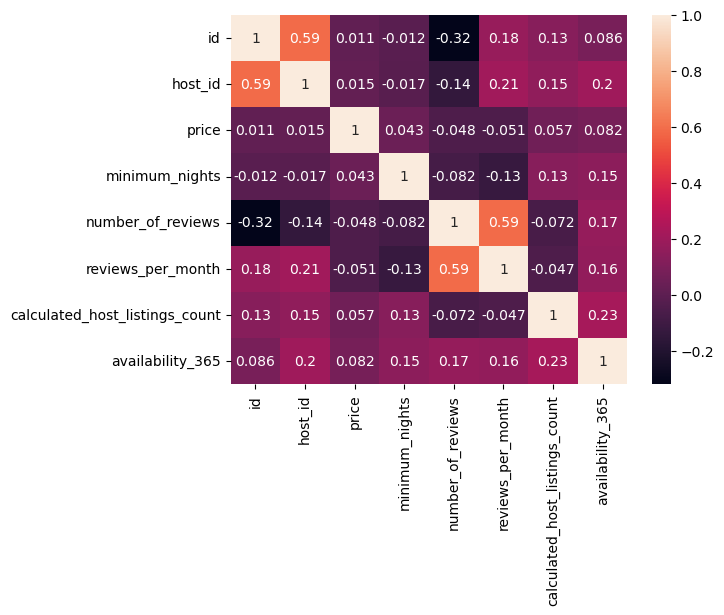

In [53]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='neighbourhood_group', ylabel='count'>

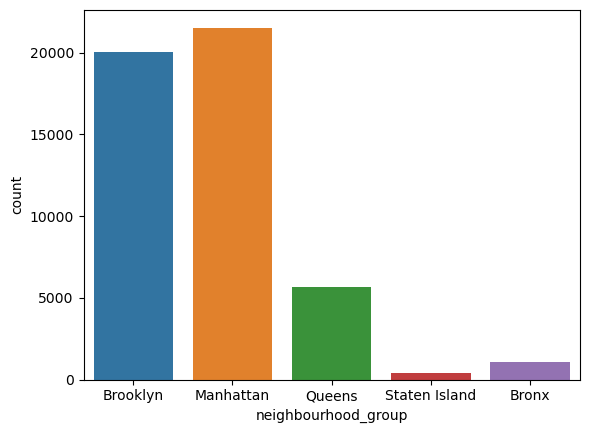

In [38]:
sns.countplot(x='neighbourhood_group',data=data)

In [39]:
v=df['room_type'].value_counts().values

In [40]:
l=df['room_type'].value_counts().index


([<matplotlib.patches.Wedge at 0x1f3ba7e4590>,
 [Text(-0.06814049934195741, 1.0978874588724605, 'Entire home/apt'),
  Text(-0.013792189412161525, -1.0999135309246901, 'Private room'),
  Text(1.0969467842400447, -0.0819008702360655, 'Shared room')],
 [Text(-0.03716754509561313, 0.5988477048395239, '51.97%'),
  Text(-0.0075230124066335575, -0.5999528350498309, '45.65%'),
  Text(0.5983346095854789, -0.04467320194694481, '2.37%')])

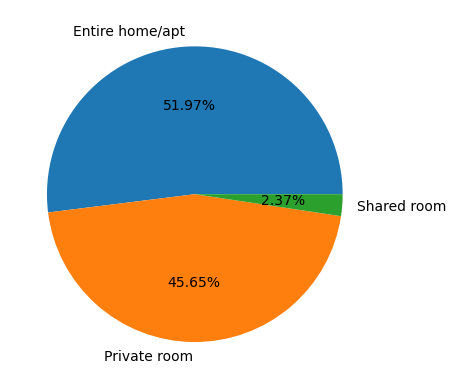

In [16]:
plt.pie(v,labels=l,autopct="%.2f%%")

Statistical Analysis

Q.Is there significant difference in the average prices of room between the neighbourhood groups?

In [18]:
from scipy.stats import f_oneway


In [24]:
bronx_price=df[df['neighbourhood_group']=='Bronx']['price']
bronx_price

171       40
207       45
260       90
261      105
309       90
        ... 
48783    140
48792     80
48795    125
48796     70
48805    100
Name: price, Length: 1089, dtype: int64

In [25]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [26]:
brooklyn_price=df[df['neighbourhood_group']=='Brooklyn']['price']
brooklyn_price

0        149
3         89
6         60
12        89
15       140
        ... 
48882     40
48884    190
48887    170
48890     70
48891     40
Name: price, Length: 20089, dtype: int64

In [27]:
manhattan_price=df[df['neighbourhood_group']=='Manhattan']['price']
manhattan_price

1        225
2        150
4         80
5        200
7         79
        ... 
48886    200
48888    125
48892    115
48893     55
48894     90
Name: price, Length: 21643, dtype: int64

In [28]:
queens_price=df[df['neighbourhood_group']=='Queens']['price']
queens_price

46       130
77        70
143      140
161       79
181      350
        ... 
48858     68
48863     93
48866     58
48878     45
48889     65
Name: price, Length: 5664, dtype: int64

In [29]:
staten_price=df[df['neighbourhood_group']=='Staten Island']['price']
staten_price

169       70
249       36
250       37
251       37
256       36
        ... 
48441     40
48446    100
48533    450
48649     54
48799    235
Name: price, Length: 373, dtype: int64

In [30]:
groups=[staten_price,bronx_price,brooklyn_price,queens_price,manhattan_price]
groups

[169       70
 249       36
 250       37
 251       37
 256       36
         ... 
 48441     40
 48446    100
 48533    450
 48649     54
 48799    235
 Name: price, Length: 373, dtype: int64,
 171       40
 207       45
 260       90
 261      105
 309       90
         ... 
 48783    140
 48792     80
 48795    125
 48796     70
 48805    100
 Name: price, Length: 1089, dtype: int64,
 0        149
 3         89
 6         60
 12        89
 15       140
         ... 
 48882     40
 48884    190
 48887    170
 48890     70
 48891     40
 Name: price, Length: 20089, dtype: int64,
 46       130
 77        70
 143      140
 161       79
 181      350
         ... 
 48858     68
 48863     93
 48866     58
 48878     45
 48889     65
 Name: price, Length: 5664, dtype: int64,
 1        225
 2        150
 4         80
 5        200
 7         79
         ... 
 48886    200
 48888    125
 48892    115
 48893     55
 48894     90
 Name: price, Length: 21643, dtype: int64]

In [33]:
stats_val,p_val=f_oneway(*groups)
p_val

2.040982645394509e-301

In [37]:
if p_val<0.05:
    print("Reject the null hypothesis,i.e:there is significant difference between the avg room prices for all neighbourhood groups")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis,i.e:there is significant difference between the avg room prices for all neighbourhood groups


In [39]:
from scipy.stats import ttest_ind

In [41]:
stats,p_val=ttest_ind(manhattan_price,brooklyn_price)
p_val

1.857969057895081e-195

In [43]:
if p_val<0.05:
    print("Reject the null hypothesis,i.e there is significant difference in the av price of rooms between brooklyn and manhattan")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis,i.e there is significant difference in the av price of rooms between brooklyn and manhattan


In [45]:
from scipy.stats import chi2_contingency

In [47]:
contingency_table=pd.crosstab(df['neighbourhood_group'],df['room_type'])
contingency_table

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,378,652,59
Brooklyn,9553,10123,413
Manhattan,13190,7973,480
Queens,2096,3370,198
Staten Island,176,188,9


In [50]:
stats,p_val,dof,expected=chi2_contingency(contingency_table,)
p_val

0.0

In [52]:
if p_val<0.05:
    print("Reject the null hypothesis,i.e there is an association between both the groups the groups are dependent ")
else:
    print("Accept the null hypothesis,i.e both the groups are independent and have no association")

Reject the null hypothesis,i.e there is an association between both the groups the groups are dependent 
